# Descriptive Analysis of house prices

See the description of the data sets [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


1. Check the quality of the data and fix missing values/duplicates if needed
2. Analyze the house prices distribution
3. Analyze the house features
4. Study correlations between variables
5. Conclusions




In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Hide deprecated warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
def extract_object_columns(df):
  # Extract all the column names
  features = df.columns.tolist()
  
  # Select only features with data type object
  nominal = []
  
  # Iterate over the column types
  for i, ele in enumerate(df.dtypes.values.tolist()):
    if ele == 'object':
      nominal.append(features[i])
    return nominal

def extract_numerical_columns(df):
  # Extract all the column names
  features = df.columns.tolist()
  
  # Select only features with data type non object
  numerical = []
  
  # Iterate over the column types
  for i, ele in enumerate(df.dtypes.values.tolist()):
    if ele != 'object':
      numerical.append(features[i])
    return numerical

# Investigate how to replace missing values for each case and complete the data set
def replace_missing_values(data, value):
    return data.fillna(value)

def replace_missing_values_by_mean(data):
    return data.apply(lambda x: x.fillna(x.mean()), axis=0)
  
def replace_missing_values_by_mode(data):
    return data.apply(lambda x: x.fillna(x.mode().values[0]), axis=0)

## Load the datasets

In [16]:
# Load data from the folder where I uploaded the csv file
data_train = pd.read_csv("/Users/gjg/code/giovjg/datascience/house_price_project/datasets/original/train.csv")
data_test = pd.read_csv("/Users/gjg/code/giovjg/datascience/house_price_project/datasets/original/test.csv")

# Concatenate both datasets for data mining process and separate them for training the model
data_train.loc[:,'set'] = 'train'
data_test.loc[:,'set'] = 'test'
data = pd.concat([data_train, data_test])

In [17]:
# Check the dimensions
data.shape

(2919, 82)

In [76]:
# Check the data types and if there are missing values
# data.info()

## Define type of variables and replace missing values

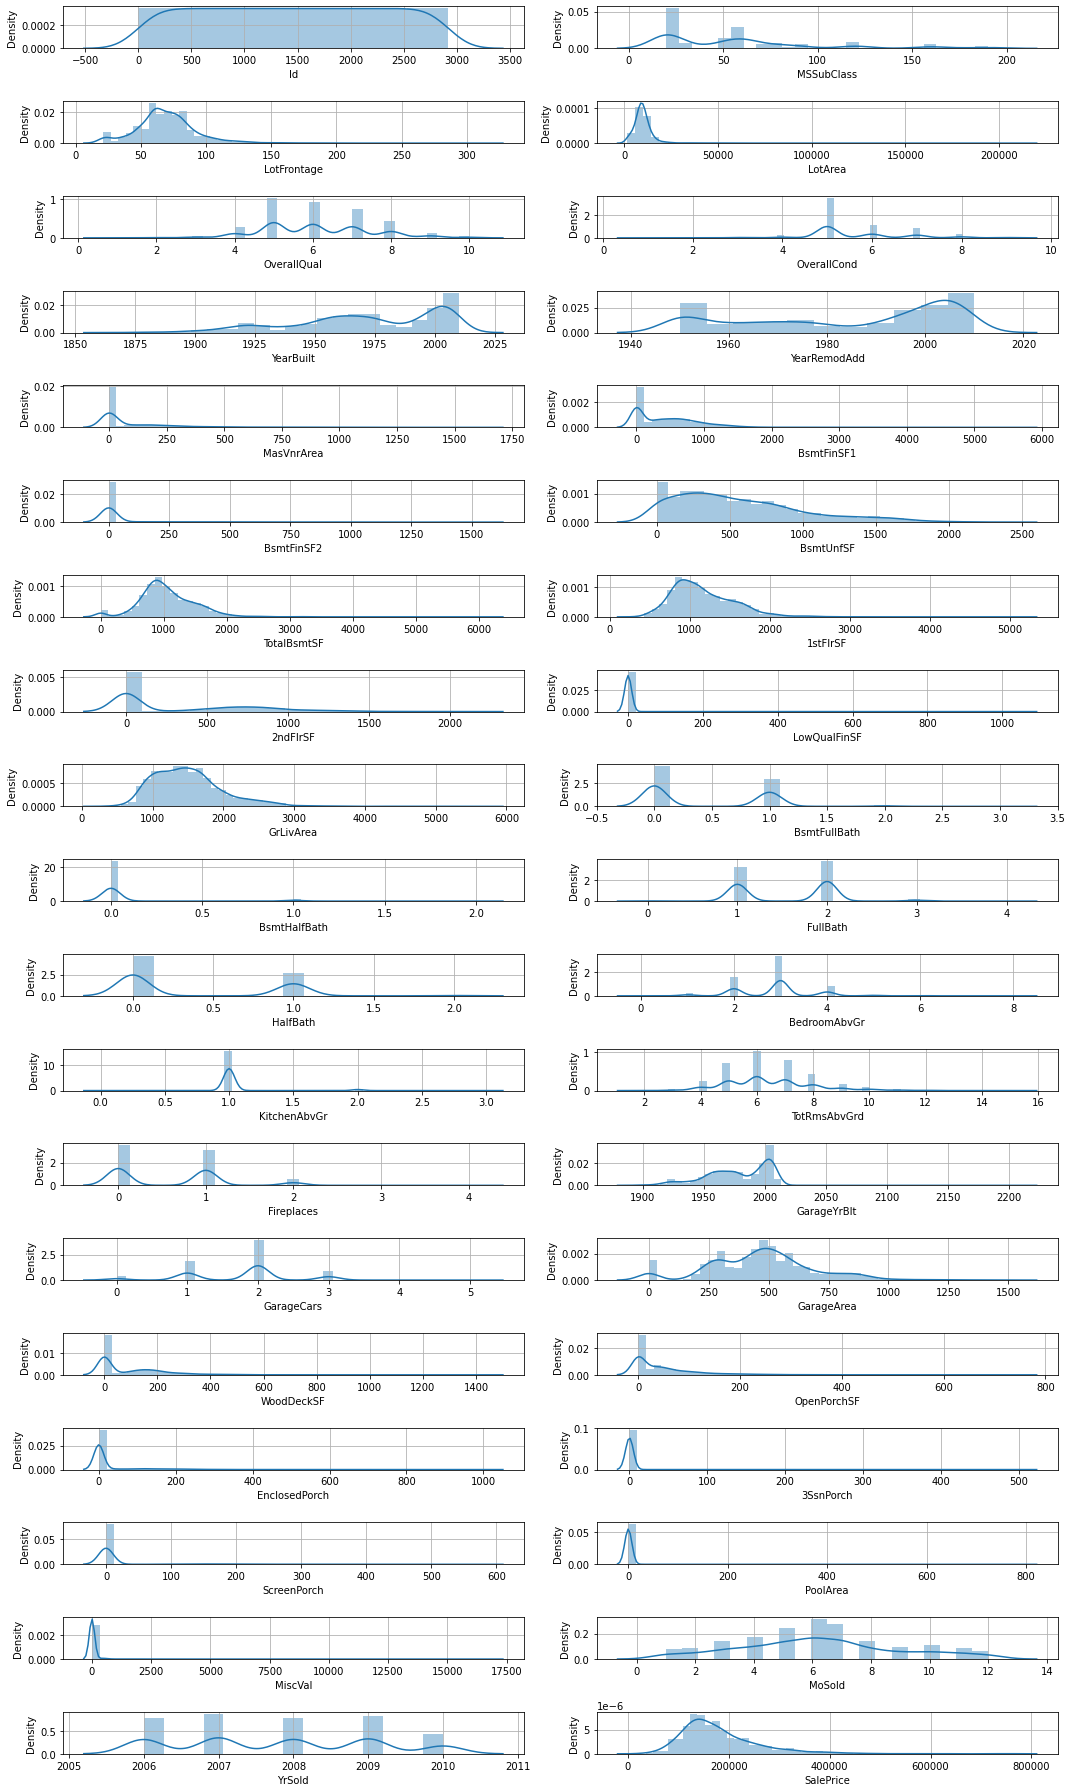

In [19]:
# Select only features with data type non object
nominal = extract_object_columns(data)

# Select only features with data type non object
numerical = extract_numerical_columns(data)

# Plot the grid of distribution plots from numerical variables
plt.figure(figsize=(15,25))
for i, feature in enumerate(numerical):
    plt.subplot(19, 2, i+1)
    sns.distplot(data[feature].dropna())
    plt.grid(True)
plt.tight_layout()

In [21]:
## Define data type of each feature
# All continuous features
cardinal = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
             'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
             'TotRmsAbvGrd','KitchenAbvGr',
             'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
             'ScreenPorch','PoolArea','MiscVal']

# # Features that specify the year of a given action will be transformed into continuous variables of "the period since"
continuous_year = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

# # Monthly seasonal feature is considered as categorical since the distribution is clearly not gaussian
categorical_int = ['MSSubClass','OverallQual','OverallCond','MoSold']

categorical_obj = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                  'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                   'Exterior1st','Exterior2nd','MasVnrType','BsmtQual','ExterCond','ExterQual','Foundation','BsmtQual',
                   'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
                   'Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',
                   'GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

# All categorical features
final_nominal = ['HouseStyle', 'PoolQC', 'GarageQual', 'OverallQual', 'SaleCondition', 'BldgType', 'KitchenQual', 
                 'Street', 'MSZoning', 'BedroomAbvGr', 'GarageCond', 'Foundation', 'Functional', 'Heating', 
                 'Utilities', 'BsmtQual', 'OverallCond', 'MasVnrType', 'MoSold', 'LandSlope', 'Electrical', 
                 'RoofMatl', 'CentralAir', 'HalfBath', 'LandContour', 'SaleType', 'GarageCars', 'MSSubClass', 
                 'Exterior2nd', 'BsmtFinType1', 'GarageFinish', 'Fireplaces', 'HeatingQC', 'YearRemodAdd', 
                 'ExterQual', 'LotShape', 'BsmtFullBath', 'BsmtFinType2', 'ExterCond', 'GarageYrBlt', 'Neighborhood', 
                 'BsmtHalfBath', 'RoofStyle', 'Exterior1st', 'Condition1', 'PavedDrive', 'Fence', 'BsmtCond', 
                 'YearBuilt', 'FullBath', 'BsmtExposure', 'Alley', 'FireplaceQu', 'YrSold', 'Condition2', 
                 'GarageType', 'MiscFeature', 'LotConfig']

In [22]:
## Define how to replace missing values in each case
# Replace by the mean values those missing ones in those continuous featuers where the values may 
# be different than 0 but likely the data was not collected for a human error
bymean = ['LotFrontage','MasVnrArea']

# Replace by the mean values those missing ones in those categorical features where the values may 
# be different than 0 but likely the data was not collected for a human error
bymode = ['KitchenQual','Utilities','Functional']

# Replace missing year (features unexisting in the given house) by the current year to extract a 
# period of 0 years. In this case the missing data may be because those houses do not have a Garage
# So I will create a peak in the distribution at 0 to consider this case
bycurrentyear = ['GarageYrBlt']

# Replace by zero those missing values in continuous features that the house could not have in some cases.
# This is the same case as the previous one but non temporal ones
byzero = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
          'GarageArea']

# Replace by unknown those missing values of features that the house my have but are not known. The lack
# of this information may be due to a human error
byunknown = ['Alley','Electrical','MiscFeature','SaleType','Exterior1st','Exterior2nd','MSZoning']

# Replace by none those missing values of categorical features that the house do not have.
bynone = ['MasVnrType','FireplaceQu','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
          'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','BsmtFullBath',
          'BsmtHalfBath','GarageCars']

In [23]:
## Replace missing values
data[bymean] = replace_missing_values_by_mean(data[bymean])
data[bymode] = replace_missing_values_by_mode(data[bymode])
data[byzero] = replace_missing_values(data[byzero], 0)
data[byunknown] = replace_missing_values(data[byunknown], 'unknown')
data[bynone] = replace_missing_values(data[bynone], 'none')
current_year = 2019
data[bycurrentyear] = replace_missing_values(data[bycurrentyear], current_year)

## Investigate the distribution of sale prices and transform to logarithmic scale to bulk the data

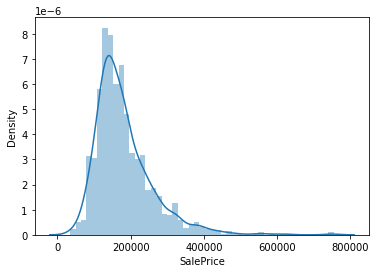

In [24]:
# Visualize distribution
_=sns.distplot(data['SalePrice'].dropna())

The distribution of the sale price is positively skewed (most values are in the left side of the histogramme). In order to use it for ML , we will have to log transform the data in order to obtain a gaussian shape.



In [25]:
# Transform the values to logarithmic scale. How does the distribution look like?
data['log_SalePrice'] = np.log(data['SalePrice'])

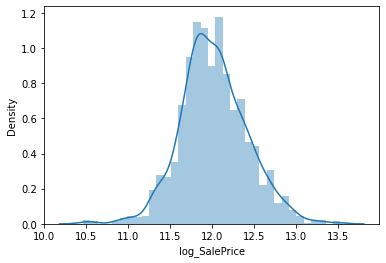

In [26]:
# Visualize the distribution of the sales prices in logarithmic scale
_=sns.distplot(data['log_SalePrice'].dropna())


## Explore the correlation between all cardinal variables and the sale prices

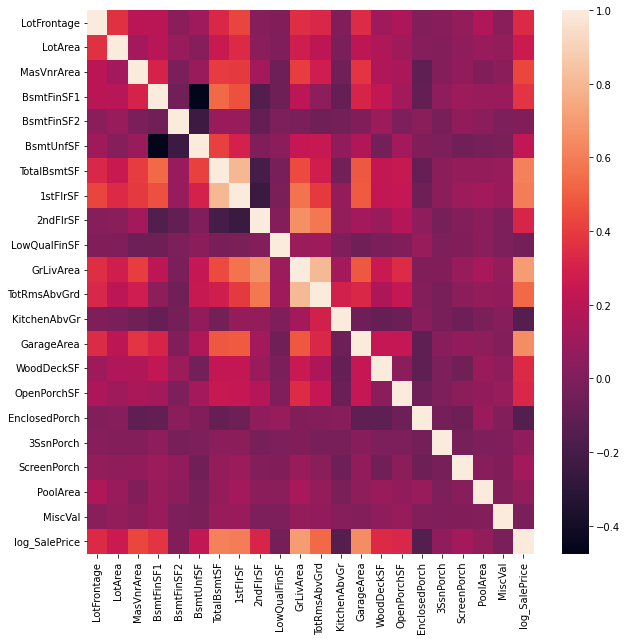

In [48]:
# Calculate the correlation matrix (including target feature)
# Plot the correlation matrix in a heatmap
cardinal_and_salesprices = cardinal + ['log_SalePrice']
fig, ax = plt.subplots(figsize=(10,10))  
_=sns.heatmap(data[cardinal_and_salesprices].corr())

Based on the correlation matrix Sale price is highly correlated with the following variables (above 0.5): Garage area Grlivarea 1st floor sf 2nd floor sf total Bs sf to a lesser extend: Masonry veneer area in square feet

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

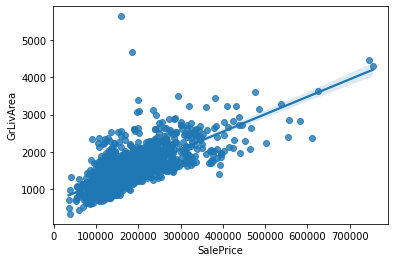

In [67]:
# Visualize correlation scatter plots for those variables of interest:
#GrLivArea, and log_SalePrice
sns.regplot(x="SalePrice", y="GrLivArea", data=data)

<AxesSubplot:xlabel='SalePrice', ylabel='GarageArea'>

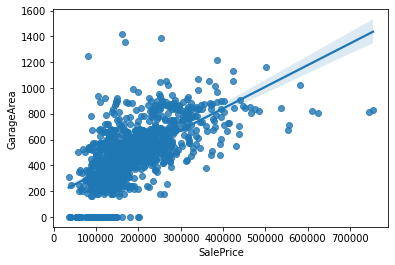

In [68]:
# Visualize correlation scatter plots for those variables of interest:
#GarageArea and log_SalePrice
sns.regplot(x="SalePrice", y="GarageArea", data=data)

<AxesSubplot:xlabel='SalePrice', ylabel='2ndFlrSF'>

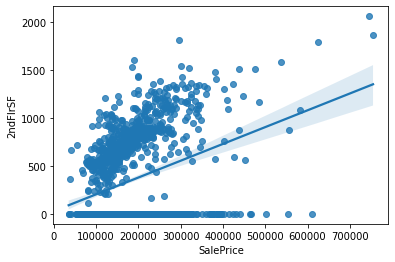

In [69]:
# Visualize correlation scatter plots for those variables of interest:
#2ndFlrSF and log_SalePrice
sns.regplot(x="SalePrice", y="2ndFlrSF", data=data)

<AxesSubplot:xlabel='SalePrice', ylabel='1stFlrSF'>

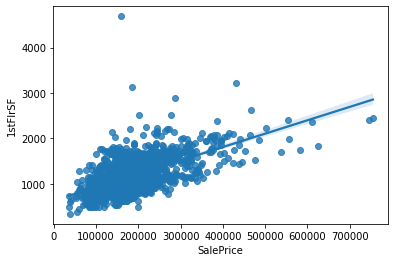

In [70]:
# Visualize correlation scatter plots for those variables of interest:
#1stFlrSFand log_SalePrice
sns.regplot(x="SalePrice", y="1stFlrSF", data=data)

<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>

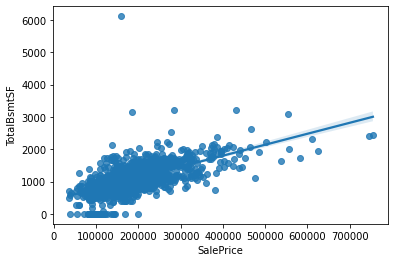

In [71]:
# Visualize correlation scatter plots for those variables of interest:
#GrLivArea, and log_SalePrice
sns.regplot(x="SalePrice", y="TotalBsmtSF", data=data)

## Explore the relation between pairs of relevant nominal variables

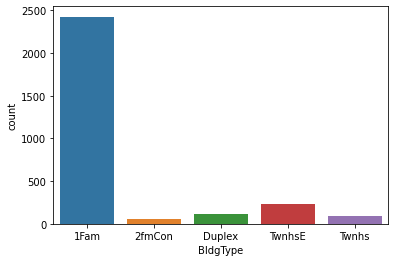

In [32]:
# What are the building classes we have?
_=sns.countplot(data['BldgType'])

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

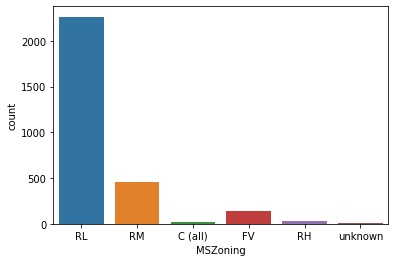

In [34]:
# What is the general zoning classification?
sns.countplot(data['MSZoning'])

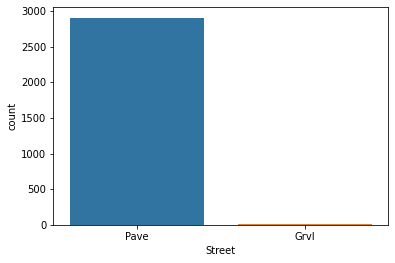

In [35]:
# How many types of road access do we have?
_=sns.countplot(data['Street'])

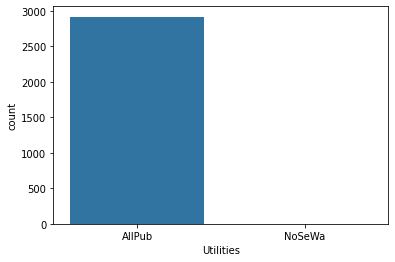

In [36]:
# What types of utilities are there available?
_=sns.countplot(data['Utilities'])

In [37]:
data.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

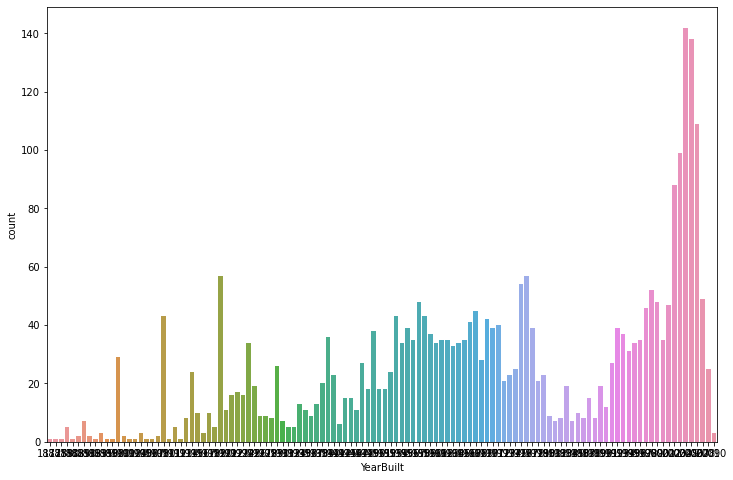

In [58]:
# Which years have these houses been built?
plt.figure(figsize=(12,8))
_=sns.countplot(data['YearBuilt'])

In [64]:
#data.groupby(['YearBuilt'])
a = data.YearBuilt.unique()

In [65]:
# print array a sorted
a.sort()
a

array([1872, 1875, 1879, 1880, 1882, 1885, 1890, 1892, 1893, 1895, 1896,
       1898, 1900, 1901, 1902, 1904, 1905, 1906, 1907, 1908, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [66]:
#how many years?
len(data.YearBuilt.unique())

118

<AxesSubplot:xlabel='Foundation', ylabel='count'>

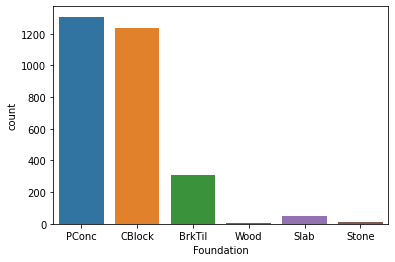

In [45]:
# What are the types of foundations?
sns.countplot(data['Foundation'])

<AxesSubplot:xlabel='Heating', ylabel='count'>

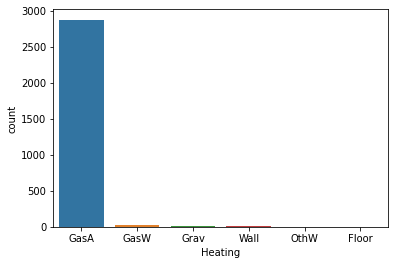

In [46]:
# What type of heating do houses have?
sns.countplot(data['Heating'])

<AxesSubplot:xlabel='SaleType', ylabel='count'>

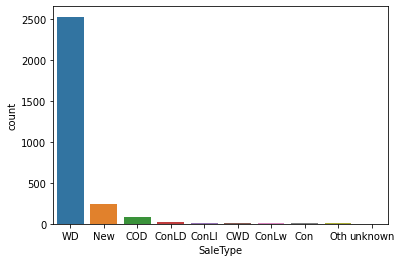

In [47]:
# What was the type of sale for houses?
sns.countplot(data['SaleType'])

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

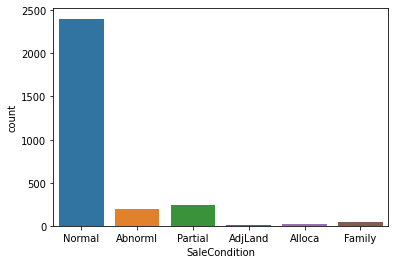

In [72]:
# Under which conditions where the sales made?
sns.countplot(data['SaleCondition'])

## Visualize contingency tables between pairs of variables of interest (only categorical for contingency): 

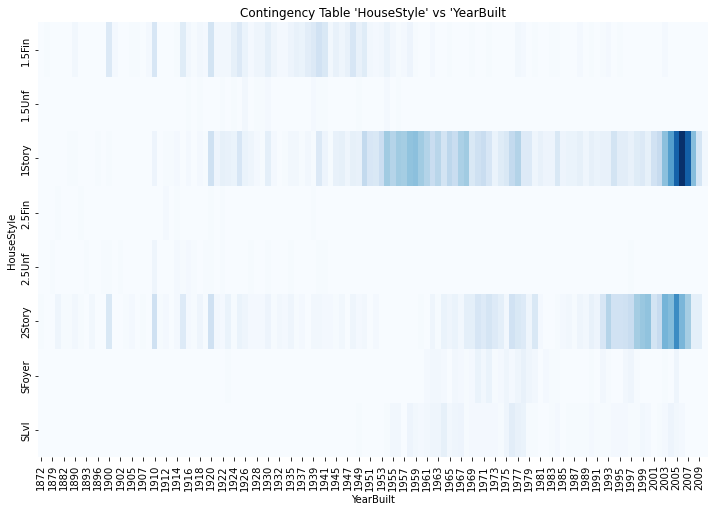

In [75]:

#Housestyle and Yearbuilt
# Visualize the contingency table between category and type
plt.figure(figsize=(12,8))
_=sns.heatmap(pd.crosstab(data['HouseStyle'], data['YearBuilt']),
            cmap="Blues", cbar=False)
_=plt.title("Contingency Table 'HouseStyle' vs 'YearBuilt")

## Save clean data

In [ ]:
# Store modified dataset into a new csv file locally
# data_clean.to_csv("path to store", index=False, encoding='utf-8')